### Premier League 23/24 Analysis and Visualization

This project invloves the following

- Webscrap Three premier league tables from [Fbref](https://fbref.com/en/). Fbref is one of the best sport data providers.
It uses html tables. We need to provide the rigt table and other input in order to scrap data.

- Combine different data tables in to one for further analysis

- Analyze traditional top 6 team performances using metrics such as XGS,Progressive Passes, Progressive Carries

- Transfer the scraped dataset to Tableau Build Tableau barbell dashboard to see which teams are over/under perfoming on XGS and by how far.
To see which teams are accurate shsooters or wasteful infront of goals. 

#### Import libraries and  packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Data Source

The data is webscraped from [Fbref](https://fbref.com/en/) website for English Premier league Standings for the 2023/24 season.

In [2]:
rank = pd.read_html('https://fbref.com/en/comps/9/Premier-League-Stats')

The output using the above code is a long list of tables of statistics. In order to clean the output, a for loop was used

In [4]:
for idx,table in enumerate(rank):
    print("********************")
    print(idx)
    print(table)

********************
0
    Rk            Squad  MP  W  D   L  GF  GA  GD  Pts  Pts/MP    xG   xGA  \
0    1  Manchester City  12  9  1   2  32  12  20   28    2.33  24.4  11.1   
1    2        Liverpool  12  8  3   1  27  10  17   27    2.25  26.5  14.5   
2    3          Arsenal  12  8  3   1  26  10  16   27    2.25  21.0   9.2   
3    4        Tottenham  12  8  2   2  24  15   9   26    2.17  19.2  18.6   
4    5      Aston Villa  12  8  1   3  29  17  12   25    2.08  23.5  15.9   
5    6   Manchester Utd  12  7  0   5  13  16  -3   21    1.75  17.5  18.9   
6    7    Newcastle Utd  12  6  2   4  27  13  14   20    1.67  23.4  13.2   
7    8         Brighton  12  5  4   3  25  21   4   19    1.58  20.8  17.0   
8    9         West Ham  12  5  2   5  21  22  -1   17    1.42  17.6  22.2   
9   10          Chelsea  12  4  4   4  21  16   5   16    1.33  25.2  15.0   
10  11        Brentford  12  4  4   4  19  17   2   16    1.33  22.1  16.3   
11  12           Wolves  12  4  3   5  16

In [8]:
#rank = pd.DataFrame(rank[0])
rank.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester City,12,9,1,2,32,12,20,28,2.33,24.4,11.1,13.3,1.11,L W W W D,42627,Erling Haaland - 13,Ederson,NaN
1,2,Liverpool,12,8,3,1,27,10,17,27,2.25,26.5,14.5,12.0,1.00,D W W D W,50648,Mohamed Salah - 10,Alisson,NaN
2,3,Arsenal,12,8,3,1,26,10,16,27,2.25,21.0,9.2,11.8,0.99,W D W L W,60130,Eddie Nketiah - 5,David Raya,NaN
3,4,Tottenham,12,8,2,2,24,15,9,26,2.17,19.2,18.6,0.6,0.05,W W W L L,61726,Son Heung-min - 8,Guglielmo Vicario,NaN
4,5,Aston Villa,12,8,1,3,29,17,12,25,2.08,23.5,15.9,7.7,0.64,D W W L W,41378,Ollie Watkins - 6,Emiliano Martínez,NaN


In [9]:
rank.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')

Now let's scrape **Shooting** data from another table available on the site in order to combine with the standings column

In [10]:
shooting=pd.read_html('https://fbref.com/en/comps/9/shooting/Premier-League-Stats')

In [11]:
# clean the output using for loop
for idx,table in enumerate(shooting):
    print("********************")
    print(idx)
    print(table)

********************
0
   Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Standard           \
                Squad               # Pl                90s      Gls   Sh SoT   
0             Arsenal                 23               12.0       25  168  55   
1         Aston Villa                 23               12.0       26  176  66   
2         Bournemouth                 25               12.0       11  138  50   
3           Brentford                 25               12.0       18  173  51   
4            Brighton                 25               12.0       23  171  70   
5             Burnley                 25               12.0        9  122  37   
6             Chelsea                 23               12.0       20  168  55   
7      Crystal Palace                 22               12.0       12  144  47   
8             Everton                 23               12.0       14  167  56   
9              Fulham                 23               12.0        9  133  42   
10   

In [12]:
shooting = pd.DataFrame(shooting[0])
shooting.columns

MultiIndex([('Unnamed: 0_level_0',   'Squad'),
            ('Unnamed: 1_level_0',    '# Pl'),
            ('Unnamed: 2_level_0',     '90s'),
            (          'Standard',     'Gls'),
            (          'Standard',      'Sh'),
            (          'Standard',     'SoT'),
            (          'Standard',    'SoT%'),
            (          'Standard',   'Sh/90'),
            (          'Standard',  'SoT/90'),
            (          'Standard',    'G/Sh'),
            (          'Standard',   'G/SoT'),
            (          'Standard',    'Dist'),
            (          'Standard',      'FK'),
            (          'Standard',      'PK'),
            (          'Standard',   'PKatt'),
            (          'Expected',      'xG'),
            (          'Expected',    'npxG'),
            (          'Expected', 'npxG/Sh'),
            (          'Expected',    'G-xG'),
            (          'Expected', 'np:G-xG')],
           )

In [13]:
shooting.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Standard           \
               Squad               # Pl                90s      Gls   Sh SoT   
0            Arsenal                 23               12.0       25  168  55   
1        Aston Villa                 23               12.0       26  176  66   
2        Bournemouth                 25               12.0       11  138  50   
3          Brentford                 25               12.0       18  173  51   
4           Brighton                 25               12.0       23  171  70   

                                                    Expected                \
   SoT%  Sh/90 SoT/90  G/Sh G/SoT  Dist FK PK PKatt       xG  npxG npxG/Sh   
0  32.7  14.00   4.58  0.11  0.35  16.5  0  6     6     21.0  16.5    0.10   
1  37.5  14.67   5.50  0.13  0.35  15.9  3  3     3     23.5  21.2    0.13   
2  36.2  11.50   4.17  0.08  0.22  17.1  6  0     0     13.8  13.8    0.10   
3  29.5  14.42   4.25  0.09  0.31  14.9  7  2     2     22.1  20.8    0.12   
4  40.9  14.25   5.83  0.13  0.31  17.1  5  1     1     20.8  20.0    0.12   

                
  G-xG np:G-xG  
0  4.0     2.5  
1  2.5     1.8  
2 -2.8    -2.8  
3 -4.1    -4.8  
4  2.2     2.0

As we can see from the above output, the shooting data is multilevel. Let's drop that

In [14]:
shooting.columns = shooting.columns.droplevel()

In [16]:
shooting.columns

Index(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh',
       'G-xG', 'np:G-xG'],
      dtype='object')

Now let's scrape **Passing** data from another table available on the site in order to combine with the standings and shooting data

In [17]:
# This code block scrape 'passing' data from the website

passing=pd.read_html('https://fbref.com/en/comps/9/passing/Premier-League-Stats')

In [18]:
# clean the output using for loop
for idx,table in enumerate(passing):
    print("********************")
    print(idx)
    print(table)

********************
0
   Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Total              \
                Squad               # Pl                90s   Cmp   Att  Cmp%   
0             Arsenal                 23               12.0  6268  7341  85.4   
1         Aston Villa                 23               12.0  5322  6326  84.1   
2         Bournemouth                 25               12.0  3812  4987  76.4   
3           Brentford                 25               12.0  4429  5689  77.9   
4            Brighton                 25               12.0  6845  7839  87.3   
5             Burnley                 25               12.0  4958  6167  80.4   
6             Chelsea                 23               12.0  6512  7588  85.8   
7      Crystal Palace                 22               12.0  4168  5294  78.7   
8             Everton                 23               12.0  3581  4867  73.6   
9              Fulham                 23               12.0  4971  6139  81.0   
10   

In [19]:
passing = pd.DataFrame(passing[0])
passing.columns

MultiIndex([( 'Unnamed: 0_level_0',   'Squad'),
            ( 'Unnamed: 1_level_0',    '# Pl'),
            ( 'Unnamed: 2_level_0',     '90s'),
            (              'Total',     'Cmp'),
            (              'Total',     'Att'),
            (              'Total',    'Cmp%'),
            (              'Total', 'TotDist'),
            (              'Total', 'PrgDist'),
            (              'Short',     'Cmp'),
            (              'Short',     'Att'),
            (              'Short',    'Cmp%'),
            (             'Medium',     'Cmp'),
            (             'Medium',     'Att'),
            (             'Medium',    'Cmp%'),
            (               'Long',     'Cmp'),
            (               'Long',     'Att'),
            (               'Long',    'Cmp%'),
            ('Unnamed: 17_level_0',     'Ast'),
            ('Unnamed: 18_level_0',     'xAG'),
            (           'Expected',      'xA'),
            (           'Expected',   'A

As with the Shooting table,the columns in the passing table are multilevel 

In [20]:
passing.columns=passing.columns.droplevel()
passing.head()

,Squad,# Pl,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp,Att,...,Cmp%,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,PrgP
0,Arsenal,23,12.0,6268,7341,85.4,107054,32954,2892,3189,...,59.6,14,12.7,13.3,1.3,131,518,145,21,630
1,Aston Villa,23,12.0,5322,6326,84.1,92330,30547,2346,2585,...,58.4,18,16.7,14.9,1.3,140,440,132,28,496
2,Bournemouth,25,12.0,3812,4987,76.4,68854,24378,1649,1880,...,45.2,6,9.3,8.9,-3.3,96,287,95,19,352
3,Brentford,25,12.0,4429,5689,77.9,80283,29549,1916,2216,...,52.9,13,16.7,15.2,-3.7,119,299,104,24,456
4,Brighton,25,12.0,6845,7839,87.3,109472,35784,3497,3764,...,62.9,18,16.5,14.8,1.5,137,417,115,21,546


In [21]:
passing.columns

Index(['Squad', '# Pl', '90s', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist',
       'Cmp', 'Att', 'Cmp%', 'Cmp', 'Att', 'Cmp%', 'Cmp', 'Att', 'Cmp%', 'Ast',
       'xAG', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP'],
      dtype='object')

##### Combine the dataframes

combine the three dataframes using pandas generic merge function on the unique identifier column **Squad**. All the variables in the rank dataframe was selected. However for the **Shooting and Passing** dataframes few variables of interest were selected.

In [22]:
team_data = pd.merge(pd.merge(rank,shooting[["Squad", "Sh", "SoT", "Dist","FK", "PK", "PKatt"]],on='Squad'),passing[['Squad','KP','PrgP']],on='Squad')
team_data.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,...,Goalkeeper,Notes,Sh,SoT,Dist,FK,PK,PKatt,KP,PrgP
0,1,Manchester City,12,9,1,2,32,12,20,28,...,Ederson,NaN,194,81,16.9,10,3,4,161,608
1,2,Liverpool,12,8,3,1,27,10,17,27,...,Alisson,NaN,213,65,18.1,7,3,4,162,632
2,3,Arsenal,12,8,3,1,26,10,16,27,...,David Raya,NaN,168,55,16.5,0,6,6,131,630
3,4,Tottenham,12,8,2,2,24,15,9,26,...,Guglielmo Vicario,NaN,192,69,17.8,4,0,0,146,639
4,5,Aston Villa,12,8,1,3,29,17,12,25,...,Emiliano Martínez,NaN,176,66,15.9,3,3,3,140,496


In [23]:
team_data.shape

(20, 28)

In [26]:
team_data[team_data['Squad']=='Liverpool']

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,...,Goalkeeper,Notes,Sh,SoT,Dist,FK,PK,PKatt,KP,PrgP
1,2,Liverpool,12,8,3,1,27,10,17,27,...,Alisson,NaN,213,65,18.1,7,3,4,162,632


Remove redundant features

In [28]:
team_data=team_data.drop(columns=['Notes','Goalkeeper'])

Select the traditional top six teams in the league and inveestigate more

In [29]:
top_6=['Manchester City','Arsenal','Liverpool','Manchester Utd','Chelsea','Tottenham']

Plot 'Shot on target' and 'Progressive Passes' features for the 6 teams and compare which team performs better on these popular metrics

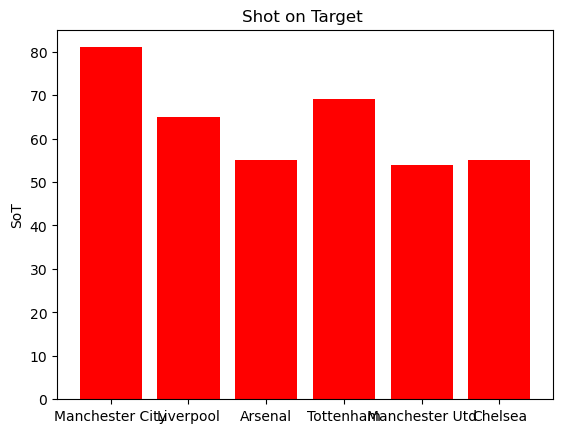

In [32]:
top6_team=team_data[team_data['Squad'].isin(top_6)]
plt.bar(top6_team['Squad'],top6_team['SoT'], color = 'red')
plt.title('Shot on Target ')
plt.ylabel('SoT')
plt.show()

The above plot shows Machester City and Tottenham are the two teams with the highest shoots on target as can be justified by their league standings as of early november

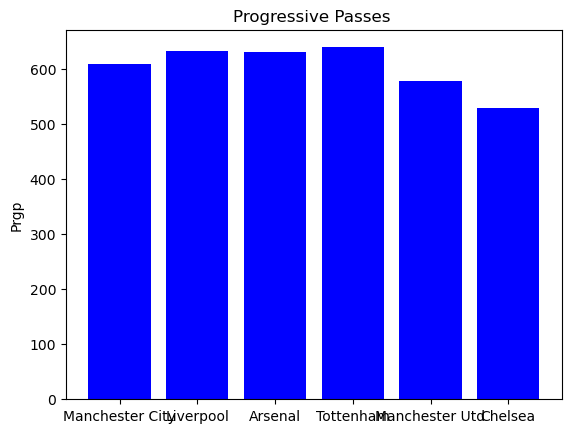

In [33]:
plt.bar(top6_team['Squad'],top6_team['PrgP'], color = 'blue')
plt.title('Progressive Passes ')
plt.ylabel('Prgp')
plt.show();

Tottenham Hotspur leads the way in progressive passses while Chelsea had the least number of progressive passes among the traditional top six English teams

Save the dataframe as a csv file for further visualization on **Tableau**. The rest of this project is performed using Tableau